In [1]:
import os
import ctypes

import matplotlib.pyplot as plt

from tensorairspace.aerospacemodel.utils.rtwtypes import *

In [2]:
class ExtY(ctypes.Structure):
    """
        Output parameters Simulink model
        (name, type)
    """
    _fields_ = [
        ("Wz", real_T),
        ("theta_big", real_T),
        ("H", real_T),
        ("alpha", real_T),
        ("theta_small", real_T),
    ]

    
class ExtU(ctypes.Structure):
    """
        INput parameters Simulink model
        (name, type)
    """
    _fields_ = [
        ("ref_signal", real_T),
    ]

In [3]:
dll_path = os.path.abspath("../tensorairspace/aerospacemodel/model/exampleModel/model_ert_shrlib_rtw/model.so")
dll = ctypes.cdll.LoadLibrary('model.so')

In [4]:
X = ExtU.in_dll(dll, 'model_U')
Y = ExtY.in_dll(dll, 'model_Y')

In [5]:
model_initialize = dll.model_initialize
model_step = dll.model_step
model_terminate = dll.model_terminate

In [6]:
model_initialize()

wz = []
theta_big = []
H = []
alpha = []
theta_small = []

for step in range(int(2100)):
    X.ref_signal = -0.1
    model_step()
    
    wz.append(Y.Wz)
    theta_big.append(Y.theta_big)
    H.append(Y.H)
    alpha.append(Y.alpha)
    theta_small.append(Y.theta_small)

model_terminate()

0

Text(0, 0.5, '$w_z$, [рад/с]')

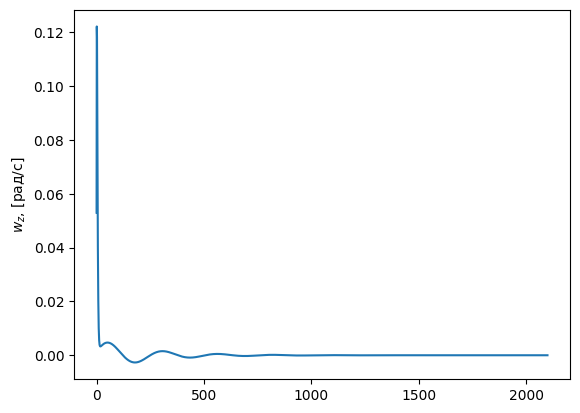

In [7]:
plt.plot(wz)

plt.ylabel('$w_z$, [рад/с]')

Text(0, 0.5, 'H, [м]')

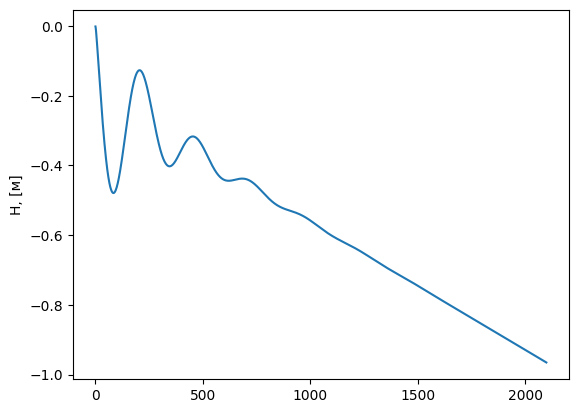

In [8]:
plt.plot(H)

plt.ylabel('H, [м]')

Text(0, 0.5, '$\\Theta$, [рад]')

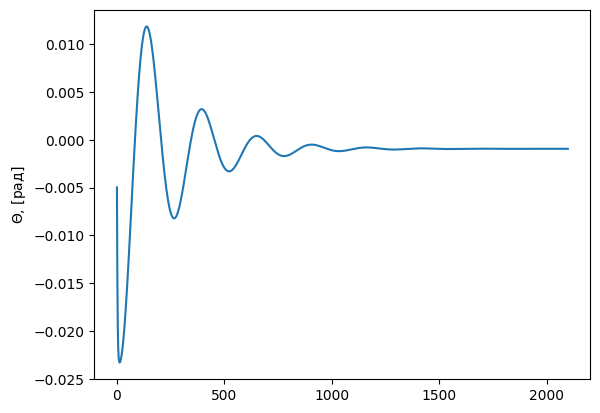

In [9]:
plt.plot(theta_big)

plt.ylabel('$\Theta$, [рад]')

Text(0, 0.5, '$\\theta$, [рад]')

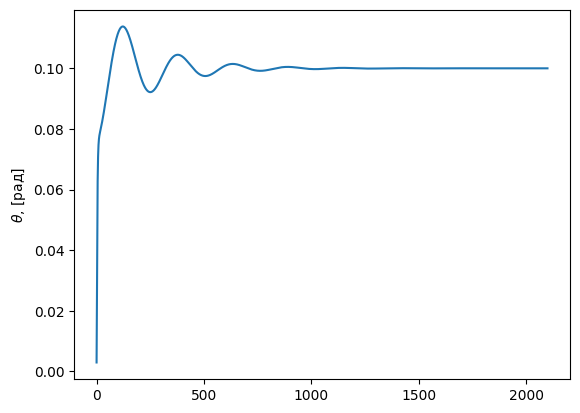

In [10]:
plt.plot(theta_small)

plt.ylabel(r'$\theta$, [рад]')

Text(0, 0.5, '$\\alpha$, [рад]')

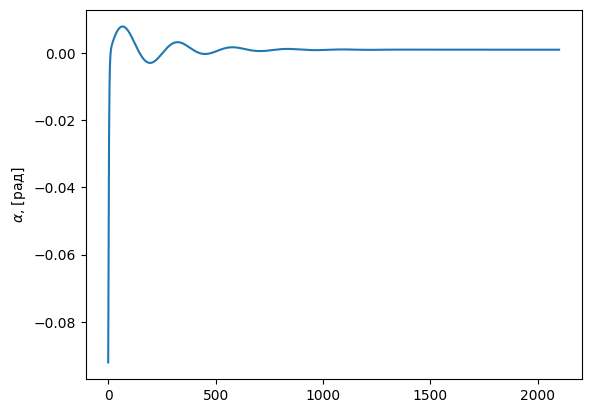

In [11]:
plt.plot(alpha)

plt.ylabel(r'$\alpha$, [рад]')